# Visualizations of the EEG data

This notebook is used for different basic visualisations of the EEG data

Author: Magnus Evensen, Malte Færgemann Lau $\\$
Project: Bachelor's Project - EEG Social Interaction

In [8]:
import h5py
import numpy as np
import mne
import os

import matplotlib.pyplot as plt
import matplotlib as mpl

# setting color palate
mpl.rcParams['image.cmap'] = 'ocean'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.ocean(np.linspace(0, 1, 64)))

mpl.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [9]:
path = os.path.abspath('../FG_Data/PreprocessedEEGDATA/311A_FG_preprocessed-epo.fif')
epochs = mne.read_epochs(path, preload=True)

# Set a standard montage
montage = mne.channels.make_standard_montage('standard_1020')
epochs.set_montage(montage)
sfreq = int(epochs.info['sfreq'])
n_epochs, n_channels, n_timepoints = epochs.get_data().shape
# Band pass filter to get wave types
epochs_copy = epochs.copy() # Create copy to leave original data untouched as it is preloaded
alpha_waves = epochs_copy.filter(l_freq=8, h_freq=12, fir_design='firwin', n_jobs=12)
epochs_copy = epochs.copy()
theta_waves = epochs_copy.filter(l_freq=4, h_freq=8, fir_design='firwin', n_jobs=12)
epochs_copy = epochs.copy()
beta_waves =  epochs_copy.filter(l_freq=12, h_freq=35, fir_design='firwin', n_jobs=12)


Reading /Users/Magnus/Documents/Skole/6. Sem/Bachelor prosjekt/Code/FG_Data/PreprocessedEEGDATA/311A_FG_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    5498.00 ms
        0 CTF compensation matrices available
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 372 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 16884 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 19200 out of 19200 | elapsed:    2.1s finished


Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 372 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 18528 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 19200 out of 19200 | elapsed:    2.4s finished


Setting up band-pass filter from 12 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 551 samples (1.102 s)



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 372 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 18528 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 19200 out of 19200 | elapsed:    1.8s finished


In [10]:
epochs

Number of events,300
Events,T12P: 30T12Pn: 30T13P: 30T13Pn: 30T1P: 30T1Pn: 30T23P: 30T23Pn: 30T3P: 30T3Pn: 30
Time range,-0.500 – 5.498 s
Baseline,off


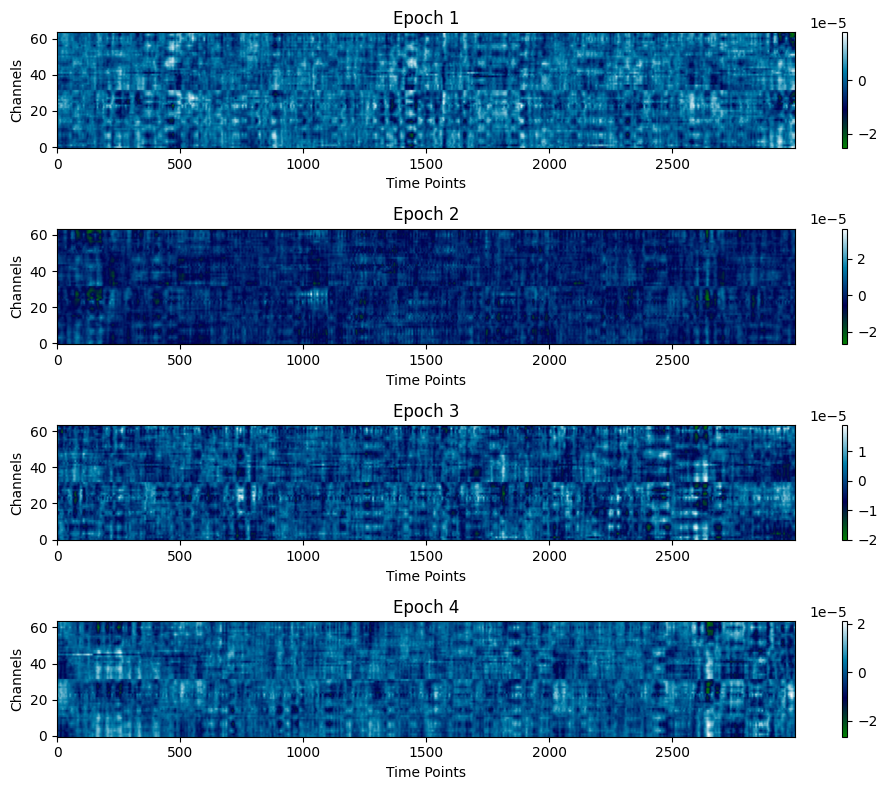

In [11]:
# Plot the first four epochs
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

for i, epoch in enumerate(epochs[:4]):
    # Display the epoch as a heatmap where:
    # - X-axis represents time points.
    # - Y-axis represents EEG channels.
    im = axs[i].imshow(epoch, aspect='auto', origin='lower')
    axs[i].set_title(f'Epoch {i+1}')
    axs[i].set_xlabel('Time Points')
    axs[i].set_ylabel('Channels')
    fig.colorbar(im, ax=axs[i], orientation='vertical')

plt.tight_layout()
plt.show()

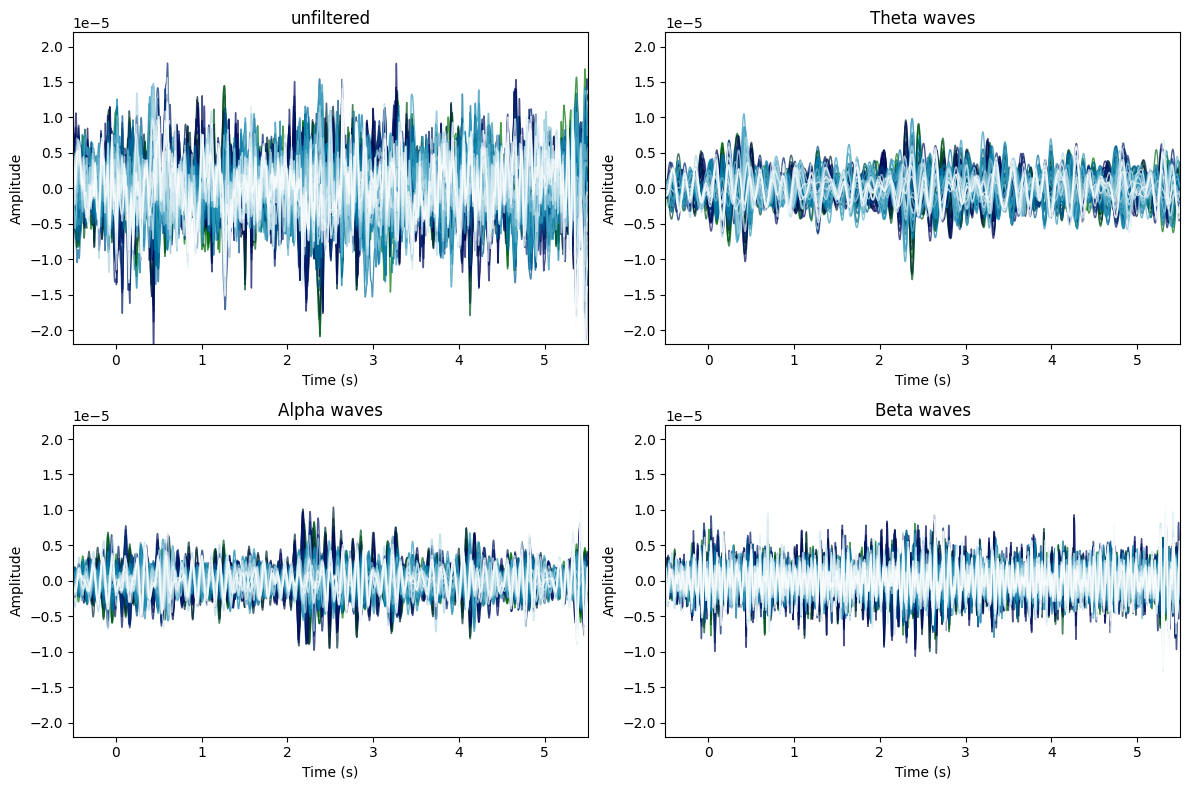

In [12]:
times = np.arange(-0.5, 5.5, 6/n_timepoints)  # time vector in seconds
# Create subplots for the four epochs (2 rows x 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, waves in enumerate([epochs.get_data()[0], theta_waves.get_data()[0], alpha_waves.get_data()[0], beta_waves.get_data()[0]]):
    ax = axes[i]
    # Plot each channel's time series as a line
    for ch in range(n_channels):
        ax.plot(times, waves[ch, :], label=f'Ch {ch+1}', alpha=0.7, lw = 1)
    ax.set_title(f"{['unfiltered', 'Theta waves', 'Alpha waves', 'Beta waves'][i]}")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_xlim(-0.5,5.5)
    ax.set_ylim(-2.2e-5,2.2e-5)
    # Uncomment the line below if you have a small number of channels and want a legend
    # ax.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

Effective window size : 1.000 (s)


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    1.8s remaining:    3.6s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    1.9s remaining:    1.4s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.5s finished


(300, 64, 40)


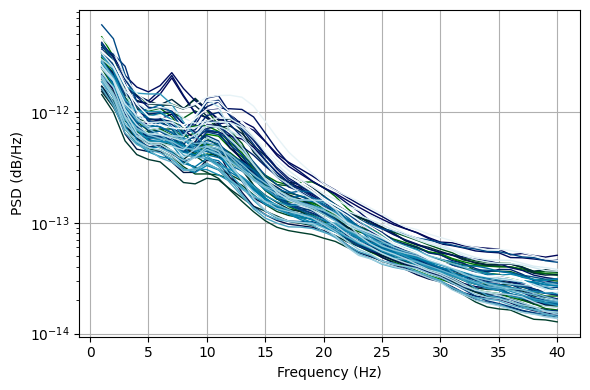

In [13]:

PSD, freqs = mne.time_frequency.psd_array_welch(epochs.get_data(), sfreq = sfreq, fmin=1, fmax = 40, n_fft=sfreq, n_overlap=int(sfreq*0.5), n_per_seg=sfreq, n_jobs=12, average='mean', window='hamming', output='power', verbose=None)
print(PSD.shape)
mean_psds = PSD.mean(axis=0)

for j,psd in enumerate(mean_psds):
    plt.semilogy(freqs, psd, lw=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)


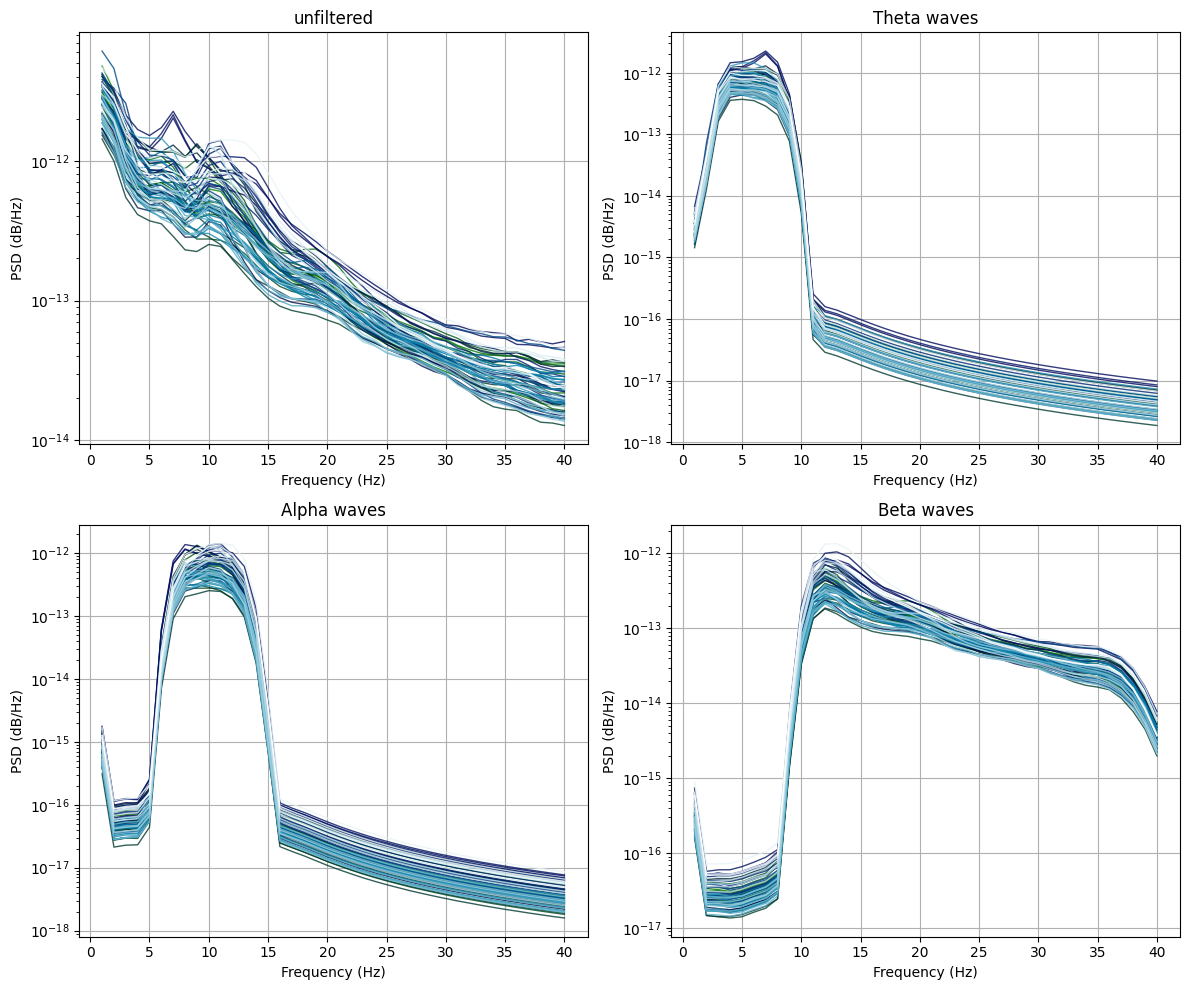

In [14]:
# 
# Create a figure with one subplot per epoch (2 rows x 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, waves in enumerate([epochs, theta_waves, alpha_waves, beta_waves]):
    psds = waves.compute_psd(method='welch', fmin=1, fmax=40, n_fft=500, n_overlap=int(sfreq*0.5))
    freqs = psds.freqs
    mean_psds = psds.get_data().mean(axis=0)

    ax = axes[i]
    for psd in mean_psds:
        ax.semilogy(freqs, psd, lw=1, alpha = 0.8)
    ax.set_title(f"{['unfiltered', 'Theta waves', 'Alpha waves', 'Beta waves'][i]}")
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('PSD (dB/Hz)')
    ax.grid(True)

plt.tight_layout()
plt.show()

Effective window size : 1.000 (s)
Averaging across epochs...


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished


Effective window size : 1.000 (s)
Averaging across epochs...


/Users/Magnus/miniconda3/envs/labram/lib/python3.12/site-packages/mne/viz/utils.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished


Effective window size : 1.000 (s)
Averaging across epochs...


/Users/Magnus/miniconda3/envs/labram/lib/python3.12/site-packages/mne/viz/utils.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished


Effective window size : 1.000 (s)
Averaging across epochs...


/Users/Magnus/miniconda3/envs/labram/lib/python3.12/site-packages/mne/viz/utils.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished
/Users/Magnus/miniconda3/envs/labram/lib/python3.12/site-packages/mne/viz/utils.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


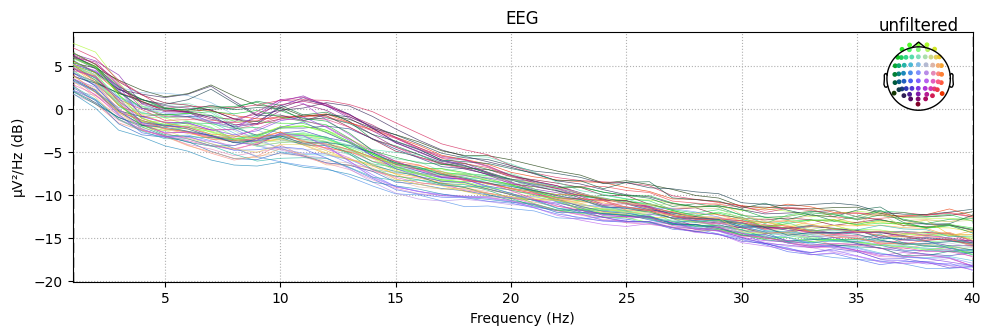

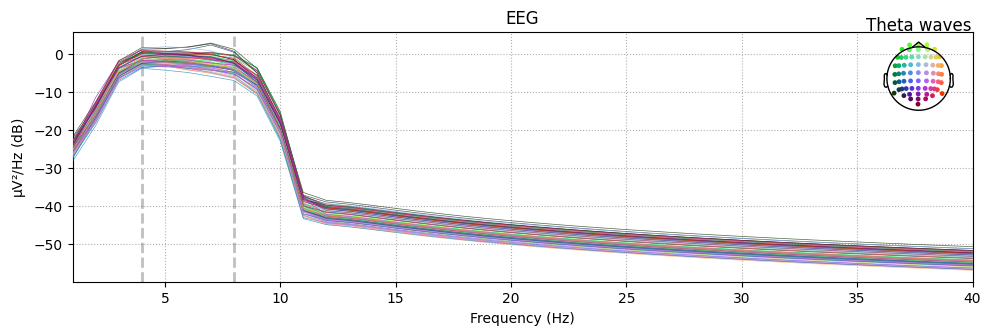

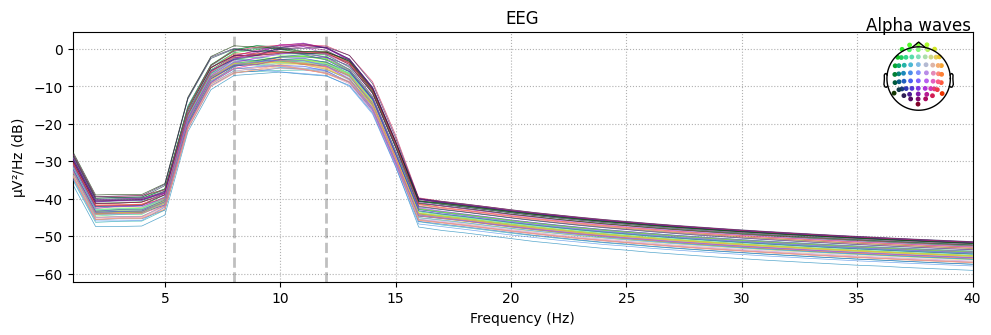

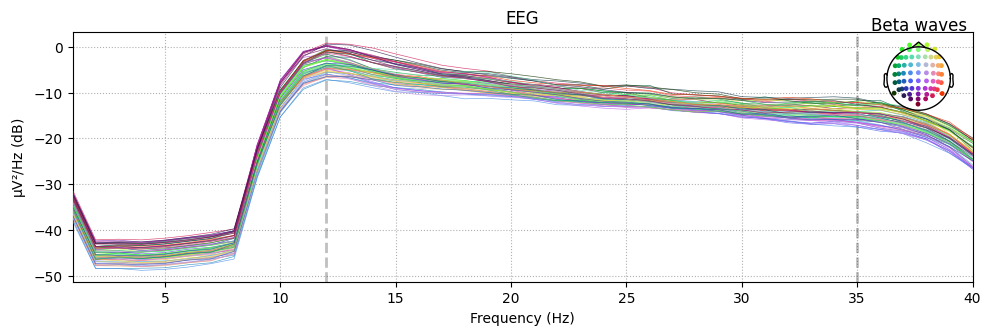

In [15]:
for i, waves in enumerate([epochs['T1P'], theta_waves['T1P'], alpha_waves['T1P'], beta_waves['T1P']]):
    psds = waves.compute_psd(method='welch', fmin=1, fmax=40, n_fft=sfreq, n_overlap=int(sfreq*0.5), n_jobs=12)
    psds.plot(picks='data', exclude='bads')
    plt.title(f"{['unfiltered', 'Theta waves', 'Alpha waves', 'Beta waves'][i]}")

Effective window size : 1.000 (s)
Averaging across epochs...


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished


Effective window size : 1.000 (s)
Averaging across epochs...


/Users/Magnus/miniconda3/envs/labram/lib/python3.12/site-packages/mne/viz/utils.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished
/Users/Magnus/miniconda3/envs/labram/lib/python3.12/site-packages/mne/viz/utils.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


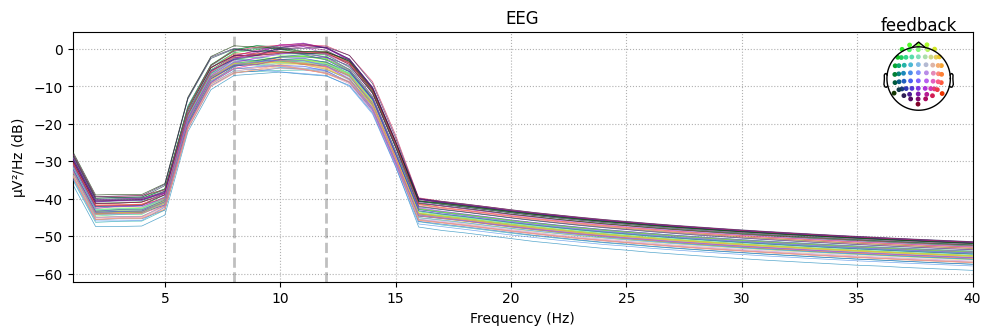

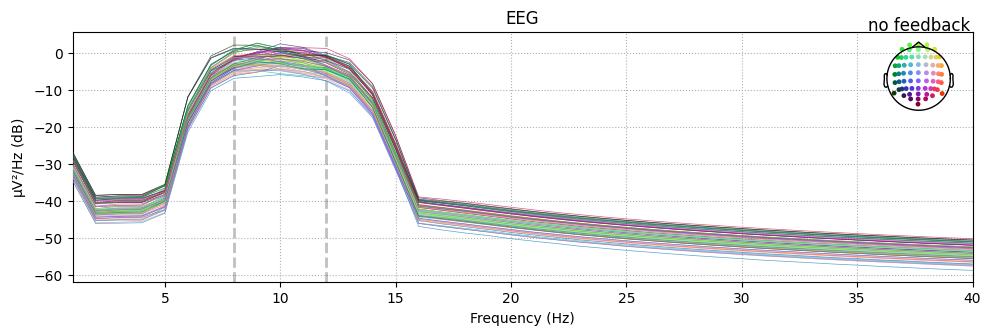

In [16]:
for i, waves in enumerate([alpha_waves['T1P'], alpha_waves['T1Pn']]):
    psds = waves.compute_psd(method='welch', fmin=1, fmax=40, n_fft=sfreq, n_overlap=int(sfreq*0.5), n_jobs=12)
    psds.plot(picks='data', exclude='bads')
    plt.title(f"{['feedback', 'no feedback', 'Alpha waves', 'Beta waves'][i]}")

Effective window size : 1.000 (s)


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.8s remaining:    1.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    1.0s remaining:    0.7s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    1.4s finished


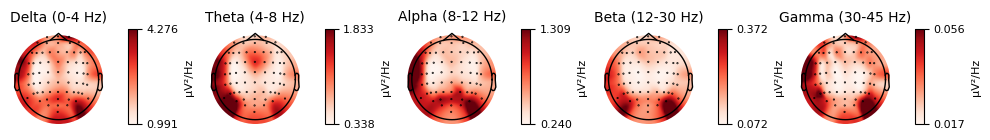

In [19]:
epochs.compute_psd(method='welch', fmin=1, fmax=40, n_fft=sfreq, n_overlap=int(sfreq*0.5), n_jobs=12).plot_topomap(contours = 0);

(119,)
(119,)


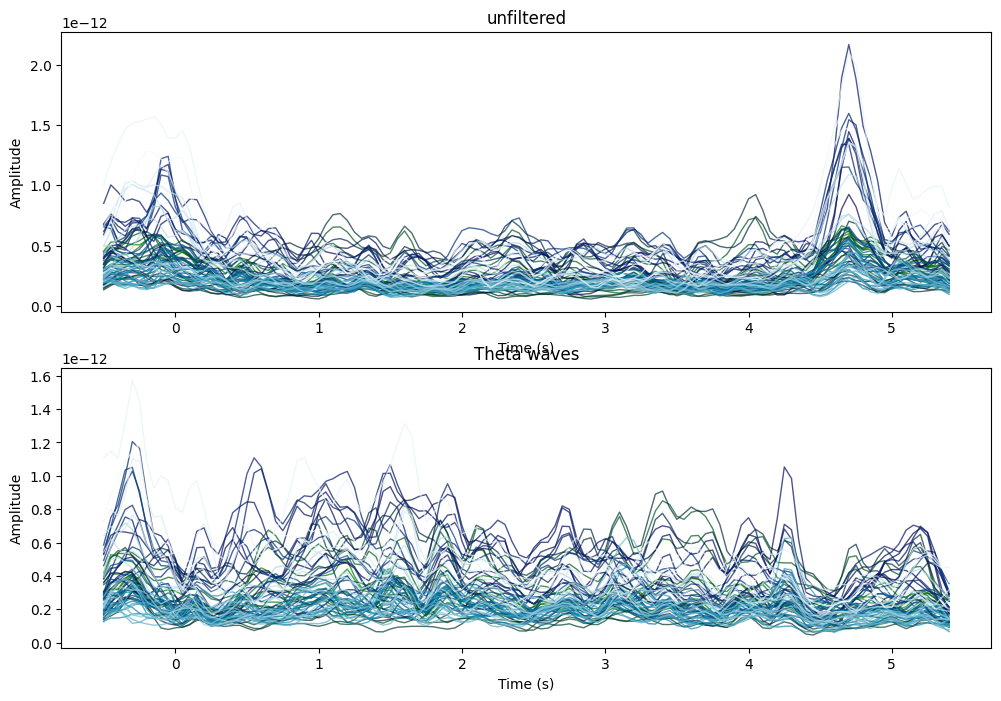

In [80]:
window = 0.1 # What should window size be?
overlap = window / 2
times = np.arange(-0.5, 6-window*5.5, overlap)


# Create subplots for the four epochs (2 rows x 2 columns)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
axes = axes.flatten()
for i, waves in enumerate([alpha_waves['T1P'], alpha_waves['T1Pn']]):
    powers = []
    for j in range(0,int(6/overlap-1)):
        t0 = j*overlap - 0.5
        t = window + t0 - 1/sfreq
        segment = waves.copy().crop(tmin = t0, tmax = t)
        psds = segment.compute_psd(method='welch', fmin=1, fmax=40, n_fft=int(sfreq*window), n_overlap=int(sfreq*0.5*window), n_jobs=12, verbose = False); # what to do about frequency here?
        mean_psds = psds.average()
        powers.append(mean_psds.get_data().sum(axis=1))
    
    powers = np.array(powers)
    print(times.shape)
    ax = axes[i]
    # Plot each channel
    for ch in range(n_channels):
        ax.plot(times, powers[:,ch], label=f'Ch {ch+1}', alpha=0.7, lw = 1)
    ax.set_title(f"{['unfiltered', 'Theta waves', 'Alpha waves', 'Beta waves'][i]}")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')

    

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


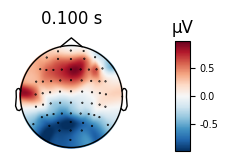

In [ ]:
# Compute the evoked (average across epochs)
evoked = epochs.average()

# Set a standard montage to provide sensor locations.
montage = mne.channels.make_standard_montage('standard_1020')
evoked.set_montage(montage)

# Plot a topomap at a specific time point (e.g., 0.1 seconds)

evoked.plot_topomap(times=0.1, ch_type='eeg', cmap='RdBu_r', contours=0, outlines='head', extrapolate='head', sphere=(0.0, 0.01, 0.015, 0.11));

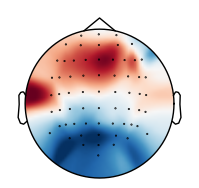

In [ ]:
time_point = 0.1  # seconds

# Convert time point to index
time_idx = evoked.time_as_index(time_point)[0]

# Create a new figure with a custom size
fig, ax = plt.subplots(figsize=(3, 2))

# Plot the topomap manually using mne.viz.plot_topomap:
mne.viz.plot_topomap(
    evoked.data[:, time_idx],
    evoked.info,
    axes=ax,
    cmap='RdBu_r',
    contours=0,
    sphere=(0.0, 0.0, 0.0, 0.11),
    extrapolate='head'
)

plt.show()

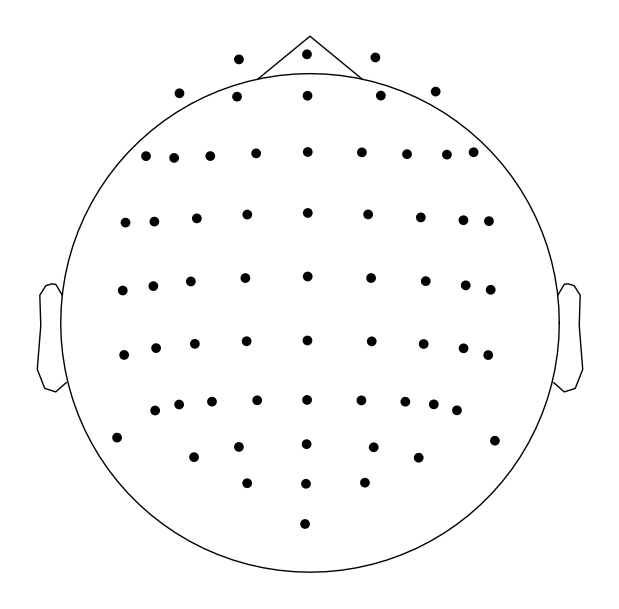

In [ ]:
evoked.plot_sensors(kind='topomap');

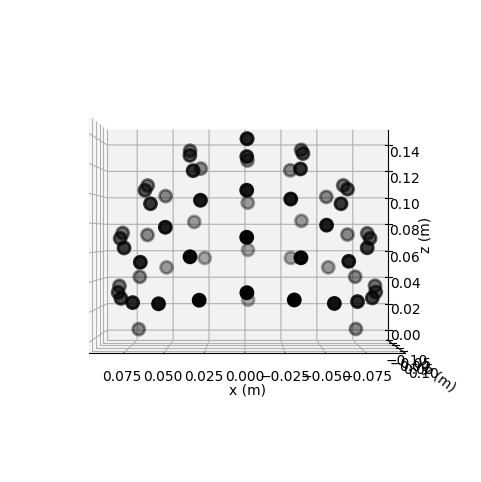

In [ ]:
evoked.plot_sensors(kind='3d');

# From AI and Human Cognition

In [ ]:
# Importing dependencies
from datetime import datetime
import numpy as np
import scipy.io
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import detrend, welch, windows
from obspy.signal.util import next_pow_2
import matplotlib.pyplot as plt

In [ ]:
# Load file from csv file
start_info = list(pd.read_csv("./Student_30.csv", skiprows=1, nrows=0, sep=";").columns)
data = pd.read_csv('./Student_30.csv', delimiter=';', skiprows=2)
RR = data['Artifact corrected RR']

#convert from miliseconds to seconds
RR_seconds = RR / 1000

# the last value should tell us how many seconds passed from the beginning to the end of the experiment
RR_cumsum = np.cumsum(RR_seconds.values)

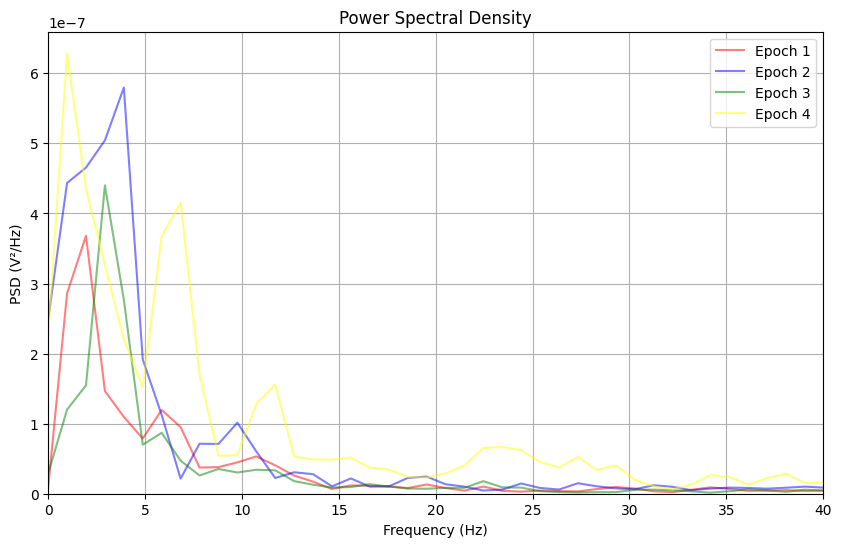

In [ ]:
fs = 1000          # Sampling frequency
window_size = 1.0  # seconds
overlap = 0.5      # fraction (50% overlap)

# Convert to samples
nperseg = int(fs * window_size)        # 500 samples for 1s
noverlap = int(nperseg * overlap)      # 250 samples for 50% overlap
nfft = next_pow_2(nperseg)             # optional: pick a power-of-two for efficiency

plt.figure(figsize=(10, 6))

for i, epoch in enumerate(epochs_data):
    mean_epoch = epoch.mean(axis=0)  # shape (n_times,)

    # Compute the PSD with Welch
    freqs, psd = welch(
        mean_epoch,
        fs=fs,
        window= windows.hamming(nperseg),
        nperseg=nperseg,
        noverlap=noverlap,
        nfft=nfft,
        scaling='density',
        detrend=False,
        return_onesided=True,
    )

    # Plot the PSD for this epoch
    plt.plot(freqs, psd, alpha=0.5, label=f"Epoch {i+1}", color = ['red', 'blue', 'green', 'yellow'][i])

plt.xlim(0, 40)   
plt.ylim(0, None)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V²/Hz)')
plt.title('Power Spectral Density')
plt.grid(True)
plt.legend()
plt.show()
